=======================================================================================

# TP de Tests Statistiques

=======================================================================================

Pour ce TP, nous allons avoir besoin de nombreuses routines qui sont codées sous **SciPy** et dans la sous-librairie **stats**

Nous allons devoir aussi utiliser des procédures de simulation qui se trouvent dans **NumPy** et dans la sous-librairie **random**

## Exemple du test du médicament B contre le médicament A

In [3]:
# Données de test de B (12 patients)
donneesB = [25,28,20,32,17,24,41,28,25,30,27,24]

In [4]:
%matplotlib notebook
import numpy as np
import pandas as pd
from scipy import stats

In [5]:
# Test de Student (one-sample test) sur la moyenne
stats.ttest_1samp(donneesB,30)

Ttest_1sampResult(statistic=-1.8525657883055058, pvalue=0.0909445611841378)

## Test de Student d'égalité entre la moyenne de deux échantillons

In [8]:
## Définissons deux distributions normales
# Taille d'échantillon
N = 10
# Loi normale de moyenne 2 et de variance 1 
a = np.random.randn(N) + 2
# Loi normale de moyenne 0 et de variance 1
b = np.random.randn(N)

In [9]:
## Calcul de l'écart-type


# On veut des estimateurs sans biais, en divisant le maximume de vraisemblance 
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

# Ecart-type
s = np.sqrt((var_a + var_b)/2)
s

0.9164088030828627

In [10]:
## On calcule la statistique de test (t-statistic)
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

In [9]:
## On compare avec la valeur critique
# Degré de liberté
df = 2*N - 2

# p-value après comparaison avec la statistique t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
# On peut voir qu'après avoir comparé avec la statistique t avec la p-value critique 
# (calculée par le logiciel) nous avons une p-value < 0.005 et nous rejetons ainsi l'hypothèse nulle 
# ce qui prouve que les moyennes des deux distributions sont statistiquement significativement différentes


t = 3.4769537272225164
p = 0.002690927491345363
t = 3.4769537272225164
p = 0.0026909274913454106


In [10]:
## Vérification avec la fonction scipy
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 3.4769537272225164
p = 0.0026909274913454106


## Application au jeu de données IRIS

Les données utilisées dans cet exemple proviennent de Kaggle.com 

In [11]:
df = pd.read_csv("https://raw.githubusercontent.com/Opensourcefordatascience/Data-sets/master//Iris_Data.csv")

Il est toujours bon de se faire une idée des données et d'examiner quelques statistiques descriptives générales. 
**Pandas** a une méthode intégrée dans *.describe()* qui donne de bonnes informations, et **Researchpy** a également une méthode qui fournit de bonnes statistiques descriptives. 

Certaines informations de ces deux méthodes se chevauchent, mais la méthode *.summary_cont()* de **Researchpy** calcule également l'écart-type et les intervalles de confiance.


In [12]:
df.groupby("species")['sepal_width'].describe()

# On peut alternativement utiliser cette fonction 
import researchpy as rp
rp.summary_cont(df.groupby("species")['sepal_width'])

N   Mean        SD        SE  95% Conf.  Interval
species                                                            
Iris-setosa      50  3.418  0.381024  0.053885   3.311313  3.524687
Iris-versicolor  50  2.770  0.313798  0.044378   2.682136  2.857864
Iris-virginica   50  2.974  0.322497  0.045608   2.883701  3.064299

En ignorant l'espèce Iris-virginica, puisqu'elle n'est pas intéressante dans cet exemple, il y a une différence entre la largeur moyenne des sépales entre les espèces setosa et versicolor :

les écarts types sont faibles pour les deux groupes, et les intervalles de confiance à 95% ne se chevauchent pas, de sorte qu'il devrait y avoir une différence significative entre ces deux cas

Pour rendre le code un peu plus propre à lire dans le reste de l'exemple, créons 2 data frames qui sont des sous-ensembles des données originales où chaque data frame contient uniquement des données pour une espèce de fleur respective. 

Les indices doivent être réinitialisés pour que les résidus puissent être calculés plus tard dans l'exemple.

In [17]:
setosa = df[(df['species'] == 'Iris-setosa')]
setosa.reset_index(inplace= True)

versicolor = df[(df['species'] == 'Iris-versicolor')]
versicolor.reset_index(inplace= True)

## Vérification des conditions théoriques du t-test de Student

Avant de procéder au test t, les hypothèses du test t doivent être vérifiées pour obtenir des résultats fiables.

## Homogénéité des variances

 Pour ce faire, utilisons le test de Levene pour l'homogénéité de la variance qui est la méthode stats.levene() de scipy.stats.

In [18]:
stats.levene(setosa['sepal_width'], versicolor['sepal_width'])

LeveneResult(statistic=0.6635459332943233, pvalue=0.4172859681296204)

Le test n'est pas significatif, ce qui signifie qu'il y a une homogénéité des variances et que nous pouvons continuer. Si le test devait être significatif, une alternative viable serait d'effectuer un test t de Welch.

## Distribution gaussienne des résidus

Ensuite, pour tester l'hypothèse de normalité, les résidus doivent être distribués normalement. Pour calculer les résidus entre les groupes, il faut soustraire les valeurs d'un groupe aux valeurs de l'autre groupe.

In [19]:
diff = setosa['sepal_width'] - versicolor['sepal_width']

La vérification de la normalité peut se faire visuellement ou à l'aide d'un test de formule.

Visuellement, on peut utiliser un  QQ-plot ou un histogramme, et/ou on peut utiliser le test de Shapiro-Wilk pour vérifier formellement la normalité. 

Pour effectuer un test formel de normalité, utilisez *stats.shapiro()* qui provient de la bibliothèque **scipy.stats** qui a été importée.

<IPython.core.display.Javascript object>


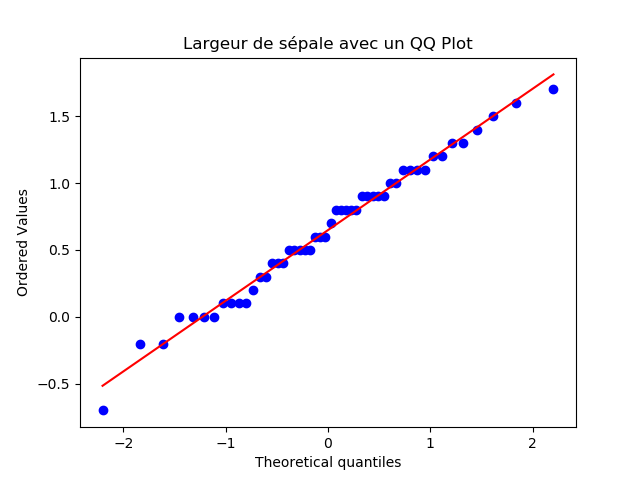

Text(0.5, 1.0, 'Largeur de sépale avec un QQ Plot')

In [26]:
from scipy import stats
import matplotlib.pyplot as plt

plt.figure()
stats.probplot(diff, plot= plt)
plt.title('Largeur de sépale avec un QQ Plot') 

Le plot montre que les données semblent gaussiennes. Voyons maintenant l'histogramme.

<IPython.core.display.Javascript object>


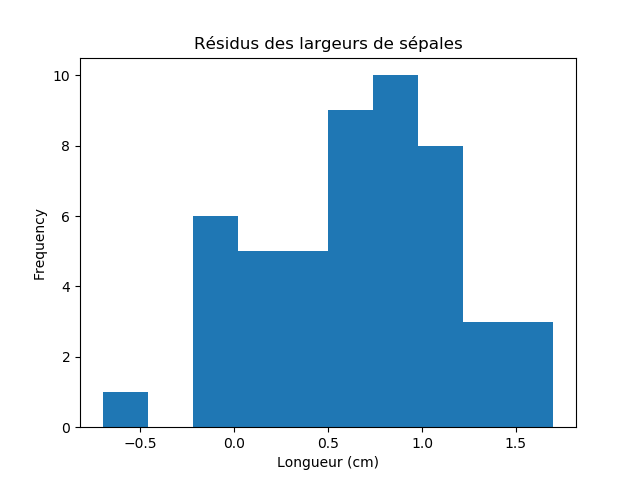

Text(0.5, 0, 'Longueur (cm)')

In [27]:
plt.figure()
diff.plot(kind= "hist", title= "Résidus des largeurs de sépales")
plt.xlabel("Longueur (cm)")
#plt.savefig("Residuals Plot of Sepal Width.png")

## Test de gaussianité de Shapiro-Wilks

In [28]:
stats.shapiro(diff)

(0.9859335422515869, 0.8108891248703003)

La sortie n'est pas étiquetée, mais la première valeur est la statistique du test W et la deuxième valeur est la p-valeur. 

Comme la statistique de test ne produit pas de p-valeur significative, il est indiqué que les données sont normalement distribuées.

Les données ont satisfait à toutes les hypothèses du test t, ce qui indique que les résultats peuvent être fiables et que le test t est un test approprié à utiliser.


## Test t de Student à deux échantillons

### T-test avec **scipy.stats**

Pour effectuer le test t en utilisant **scipy.stats**, utilisez la méthode *stats.ttest_ind()*

In [29]:
stats.ttest_ind(setosa['sepal_width'], versicolor['sepal_width'])

Ttest_indResult(statistic=9.282772555558111, pvalue=4.362239016010214e-15)

Il manque à cette méthode certaines informations utiles, comme les degrés de liberté, la différence entre les moyennes des groupes et une mesure de la taille de l'effet. Tout cela peut être calculé manuellement. Cependant, ces informations sont fournies par la méthode de researchpy.

### T-test avec researchpy

Pour effectuer le test t à l'aide de **researchpy**, utilisez la méthode *researchpy.ttest()*  

Cette méthode produit les informations retournées dans deux data frames. 

Pour une sortie et une présentation plus propres, assignons le tableau de statistiques descriptives (le premier tableau renvoyé) et les résultats du test (le second tableau renvoyé) comme des objets séparés.

In [31]:
descriptives, results = rp.ttest(setosa['sepal_width'], versicolor['sepal_width'])

In [32]:
descriptives

Variable      N   Mean        SD        SE  95% Conf.  Interval
0  sepal_width   50.0  3.418  0.381024  0.053885   3.309714  3.526286
1  sepal_width   50.0  2.770  0.313798  0.044378   2.680820  2.859180
2     combined  100.0  3.094  0.476057  0.047606   2.999540  3.188460

Ce tableau de statistiques descriptives est le même que celui produit précédemment pour cet exemple.

Toutefois, cette méthode utilise le nom de la colonne de la variable qui est exactement le même pour les deux bases de données de cet exemple, ce qui le rend moins propre que le tableau produit précédemment. 

In [33]:
results

Independent t-test  results
0  Difference (sepal_width - sepal_width) =    0.6480
1                      Degrees of freedom =   98.0000
2                                       t =    9.2828
3                   Two side test p value =    0.0000
4                  Difference < 0 p value =    1.0000
5                  Difference > 0 p value =    0.0000
6                               Cohen's d =    1.8566
7                               Hedge's g =    1.8423
8                           Glass's delta =    1.7007
9                                       r =    0.6840

Les résultats sont les mêmes avec les deux méthodes, il y a une différence significative dans la longueur des sépales entre les espèces florales setosa et versicolor. 

En utilisant **researchpy**, nous obtenons également des valeurs p unilatérales, les degrés de liberté et quelques mesures de la taille de l'effet.

# Interprétation des résultats

Nous souhaitions vérifier s'il existe une différence significative dans la largeur des sépales entre les espèces florales Iris-setosa et Iris-versicolor. 

La largeur moyenne des sépales de l'Iris-setosa (M= 3,418, ET= 0,381) est plus large et présente une variation légèrement plus importante que celle de l'Iris-versicolor (M= 2,770, ET= 0,314). 

Un test t a été utilisé pour vérifier l'existence d'une différence. 

Il existe une différence statistiquement significative entre la largeur des sépales de l'iris sétosique et de l'iris de couleur (t(98)= 9,282, p< 0,0001, r= 0,6840).
